In [15]:
import numpy as np
class Perceptron(object):
    def __init__(self,eta=0.01,n_inter=10):
        self.eta = eta
        self.n_inter = n_inter
    def fit(self,X,y):
        self.w_ = np.zeros(1+X.shape[1])
        self.erros_ = []
        for _ in range(self.n_inter):
            errors = 0
            for xi,target in zip(X,y):
                updata = self.eta*(target - self.predict(xi))
                self.w_[1:]+=updata *xi
                self.w_[0] += updata
                errors += int(updata !=0)
                self.erros_.append(errors)
    def net_input(self,X):
        return np.dot(X,self.w_[1:] + self.w_[0])
           
    def predict(self,X):
        return np.where(self.net_input(X)>=0.0, 1, -1)

In [16]:
file="iris.csv"
import pandas as pd
df = pd.read_csv(file,header = None)
#df.head(10)

In [17]:
import matplotlib.pyplot as plt
import numpy as np

y =df.loc[0:100,4].values
y = np.where( y =="Iris-setosa",1,-1)

X = df.iloc[0:100,[0,2]].values
#plt.scatter(X[:50,0],X[:50,1],c="red",marker='o',label="0:49")
#plt.scatter(X[50:100,0],X[50:100,1],c="blue",marker='x',label='50:99')
#plt.xlabel('X')
#plt.ylabel('y')
#plt.legend(loc='upper left')
#plt.show()


In [18]:
ppn = Perceptron(eta = 0.1,n_inter=10)
ppn.fit(X,y)

In [21]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,resolution = 0.02):
    marks = ('s','x','o','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min,x1_max = X[:,0].min()-1,X[:,0].max()
    x2_min,x2_max = X[:,1].min()-1,X[:,1].max()
    
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                         np.arange(x2_min,x2_max,resolution))
    #print(np.arange(x1_min,x1_max,resolution).shape,type(xx1))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    #print((np.array([xx1.ravel(),xx2.ravel()]).T).shape)
    # print(Z.shape)
    Z = Z.reshape(xx1.shape)
    #print(Z.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='setosa')         
    plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='x',label='versicolor')
    plt.xlabel(u'X',fontproperties='SimHei')
    plt.ylabel(u'Y',fontproperties='SimHei')
    plt.legend(loc='upper left')
    plt.show()    
 

D:\Anaconda\lib\site-packages\numpy\ma\core.py:6512: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
D:\Anaconda\lib\site-packages\numpy\ma\core.py:6512: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


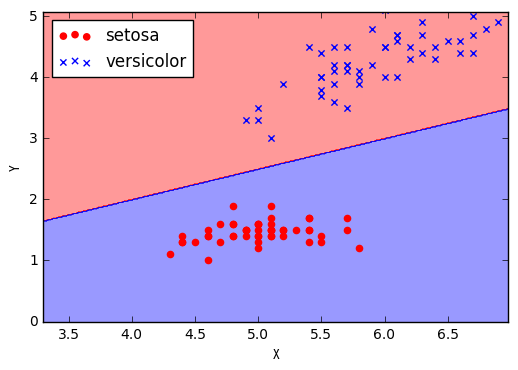

In [22]:
plot_decision_regions(X,y,ppn,resolution = 0.02)